<center>
# ПРИЛОЖЕНИЕ 5
<center>
# ПРИМЕР ПРЕДВАРИТЕЛЬНОЙ ПОДГОТОВКИ ДАННЫХ (КОНКУРСНАЯ ЗАДАЧА ПРЕДСКАЗАНИЯ ОТКЛИКА ОТП БАНКА)

## ЭТАП I. ПОСТРОЕНИЕ МОДЕЛИ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ - ЧАСТИ ИСТОРИЧЕСКОЙ ВЫБОРКИ И ЕЕ ПРОВЕРКА НА КОНТРОЛЬНОЙ ВЫБОРКЕ - ЧАСТИ ИСТОРИЧЕСКОЙ ВЫБОРКИ

In [1]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

## I.1. Считывание CSV-файла, содержащего исторические данные, в объект DataFrame

In [2]:
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 60)
# загружаем набор данных
data = pd.read_csv('Data/Credit_OTP.csv', encoding='cp1251', sep=';')
# выводим первые 5 наблюдений
data.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,0,1,220,18.0,0,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,0,1,137,97.0,1,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,0,1,251,84.0,0,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,0,36,168.0,1,1,1,1,1,6,3,1,"1589,923333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,0,1,83,101.0,1,0,1,2,1,16,2,1,"1152,15",2230,NaN


## I.2. Преобразование типов переменных

In [3]:
# выводим информацию о количестве непропущенных 
# наблюдений в переменных и типах переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

In [4]:
# переменные, неверно записанные как количественные,
# преобразуем в тип object
for i in ['AGREEMENT_RK', 'TARGET', 'SOCSTATUS_WORK_FL', 
          'SOCSTATUS_PENS_FL', 'GENDER',
          'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 
          'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 
          'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 
          'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'DL_DOCUMENT_FL', 
          'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL']:
    data[i] = data[i].astype('object')

# в указанных переменных заменяем запятую на точку в качестве
# десятичного разделителя и преобразуем в тип float
for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 
          'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
    data[i] = data[i].str.replace(',', '.').astype('float')
    
# вновь смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null object
TARGET                        15223 non-null object
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null object
SOCSTATUS_PENS_FL             15223 non-null object
GENDER                        15223 non-null object
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null float64
REG_ADDRE

## I.3. Импутация пропусков, не использующая результаты математических вычислений (импутация, которую можно выполнять до/после разбиения на обучение/контроль)

In [5]:
# если в интересующей нас переменной есть пропуск 
# и при этом переменная SOCSTATUS_PENS_FL имеет значение 1,
# заменяем такие пропуски меткой "Не указано"
data['GEN_INDUSTRY'] = np.where(data['GEN_INDUSTRY'].isnull() \
                                | (data['SOCSTATUS_PENS_FL'] == 1), 
                                'Не указано', data['GEN_INDUSTRY'])
data['GEN_TITLE'] = np.where(data['GEN_TITLE'].isnull()  \
                             | (data['SOCSTATUS_PENS_FL'] == 1), 
                             'Не указано', data['GEN_TITLE'])
data['ORG_TP_STATE'] = np.where(data['ORG_TP_STATE'].isnull() \
                                | (data['SOCSTATUS_PENS_FL'] == 1),
                                'Не указано', data['ORG_TP_STATE'])
data['ORG_TP_FCAPITAL'] = np.where(data['ORG_TP_FCAPITAL'].isnull() \
                                   | (data['SOCSTATUS_PENS_FL'] == 1), 
                                   'Не указано', data['ORG_TP_FCAPITAL'])

# заменяем пропуски в указанных переменных
# меткой "Не указано"
data['JOB_DIR'] = np.where(data['JOB_DIR'].isnull(), 'Не указано', data['JOB_DIR'])
data['REGION_NM'] = np.where(data['REGION_NM'].isnull(), 'Не указано', data['REGION_NM'])

# пропуски в переменной TP_PROVINCE заменим значением
# переменной FACT_ADDRESS_PROVINCE
data['TP_PROVINCE'] = np.where(data['TP_PROVINCE'].isnull(), 
                               data['FACT_ADDRESS_PROVINCE'], data['TP_PROVINCE'])
    
# заменяем пропуски в переменной 
# PREVIOUS_CARD_NUM_UTILIZED нулями
data['PREVIOUS_CARD_NUM_UTILIZED'] = np.where(data['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 0, 
                                              data['PREVIOUS_CARD_NUM_UTILIZED'])
# смотрим количество пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null object
TARGET                        15223 non-null object
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null object
SOCSTATUS_PENS_FL             15223 non-null object
GENDER                        15223 non-null object
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  15223 non-null object
GEN_TITLE                     15223 non-null object
ORG_TP_STATE                  15223 non-null object
ORG_TP_FCAPITAL               15223 non-null object
JOB_DIR                       15223 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null float64
REG_ADDRE

## I.4. Обработка редких категорий

In [6]:
# выделяем категориальные переменные в группу
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

# выводим статистики по категориальным переменным,
# смотрим unique - количество уникальных значений,
# выявляем бесполезные переменные - переменные, у
# которых уникальных значений столько, сколько
# наблюдений (AGREEMENT_RK), и переменные с одним
# уникальным значением (DL_DOCUMENT_FL)
data[categorical_columns].describe()

,AGREEMENT_RK,TARGET,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL
count,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223
unique,15223,2,2,2,2,7,5,32,13,6,3,11,5,81,81,80,72,12,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,64585727,0,1,0,1,Среднее специальное,Состою в браке,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Краснодарский край,Краснодарский край,Кемеровская область,Краснодарский край,ЮЖНЫЙ,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1
freq,1,13411,13847,13176,9964,6518,9416,2303,6680,6267,13009,11452,7077,674,674,674,790,2179,12765,14480,13493,12758,13782,10507,14097,11940,15074,14930,14558,15223,8961,9311,14389,13855


In [7]:
# удаляем идентификационную переменную AGREEMENT_RK,
# потому что у нее количество уникальных значений
# равно количеству наблюдений
data.drop('AGREEMENT_RK', axis=1, inplace=True)

# удаляем переменную DL_DOCUMENT_FL, потому что 
# у нее одно уникальное значение
data.drop('DL_DOCUMENT_FL', axis=1, inplace=True)

In [8]:
# заново выделим категориальные переменные в группу
# и пробежим по ней, выводя частоты категорий
# по каждой категориальной переменной, чтобы
# выявить редкие категории
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts(dropna=False))

0    13411
1     1812
Name: TARGET, dtype: int64
1    13847
0     1376
Name: SOCSTATUS_WORK_FL, dtype: int64
0    13176
1     2047
Name: SOCSTATUS_PENS_FL, dtype: int64
1    9964
0    5259
Name: GENDER, dtype: int64
Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: EDUCATION, dtype: int64
Состою в браке        9416
Не состоял в браке    3622
Разведен(а)           1245
Вдовец/Вдова           588
Гражданский брак       352
Name: MARITAL_STATUS, dtype: int64
Торговля                                     2303
Не указано                                   2048
Другие сферы                                 1639
Металлургия/Промышленность/Машиностроение    1285
Государственная служба                       1223
Здравоохранение                              1087
Образование

In [9]:
# заменяем категорию "Не указано" на категорию "ЮЖНЫЙ"
data['REGION_NM'] = np.where(data['REGION_NM'] == 'Не указано', 'ЮЖНЫЙ', 
                             data['REGION_NM'])
    
# заменяем неверную категорию "ПОВОЛЖСКИЙ" на категорию "ПРИВОЛЖСКИЙ"
data.at[data['REGION_NM'] == 'ПОВОЛЖСКИЙ', 'REGION_NM'] = 'ПРИВОЛЖСКИЙ'
    
# записываем редкие категории в одну отдельную категорию
for i in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
    data[i] = np.where((data[i] == 'Москва') \
                       | (data[i] == 'Хакасия') \
                       | (data[i] == 'Ямало-Ненецкий АО') \
                       | (data[i] == 'Магаданская область') \
                       | (data[i] == 'Калмыкия') \
                       | (data[i] == 'Дагестан') \
                       | (data[i] == 'Агинский Бурятский АО') \
                       | (data[i] == 'Усть-Ордынский Бурятский АО') \
                       | (data[i] == 'Эвенкийский АО') \
                       | (data[i] == 'Коми-Пермяцкий АО') \
                       | (data[i] == 'Чечня'), 
                       'ДРУГОЕ', data['REG_ADDRESS_PROVINCE'])

data['TP_PROVINCE'] = np.where((data['TP_PROVINCE'] == 'Сахалинская область') \
                               | (data['TP_PROVINCE'] == 'Еврейская АО') \
                               | (data['TP_PROVINCE'] == 'Магаданская область') \
                               | (data['TP_PROVINCE'] == 'Дагестан') \
                               | (data['TP_PROVINCE'] == 'Кабардино-Балкария'), 
                               'ДРУГОЕ', data['TP_PROVINCE'])

In [10]:
# укрупняем категории переменной EDUCATION
data.at[data['EDUCATION'] == 'Ученая степень', 'EDUCATION'] = 'Высшее'
data.at[data['EDUCATION'] == 'Два и более высших образования', 'EDUCATION'] = 'Высшее'

# смотрим частоты категорий переменной EDUCATION
data['EDUCATION'].value_counts(dropna=False)

Среднее специальное    6518
Среднее                4679
Высшее                 3154
Неоконченное высшее     532
Неполное среднее        340
Name: EDUCATION, dtype: int64

In [11]:
# записываем некоторые категории переменной GEN_INDUSTRY 
# в отдельную категорию
data.at[data['GEN_INDUSTRY'] == 'Юридические услуги/нотариальные услуги', 
        'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Страхование', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Туризм', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Недвижимость', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Управляющая компания', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Логистика', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Подбор персонала', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Маркетинг', 'GEN_INDUSTRY'] = 'Другие сферы'

# смотрим частоты категорий переменной GEN_INDUSTRY
data['GEN_INDUSTRY'].value_counts(dropna=False)

Торговля                                     2303
Не указано                                   2048
Другие сферы                                 1776
Металлургия/Промышленность/Машиностроение    1285
Государственная служба                       1223
Здравоохранение                              1087
Образование                                   923
Транспорт                                     763
Сельское хозяйство                            670
Строительство                                 556
Коммунальное хоз-во/Дорожные службы           495
Ресторанный бизнес/Общественное питание       393
Наука                                         361
Нефтегазовая промышленность                   220
Банк/Финансы                                  168
Сборочные производства                        167
Энергетика                                    139
Развлечения/Искусство                         129
ЧОП/Детективная д-ть                          128
Информационные услуги                         102


In [12]:
# укрупняем категории переменной GEN_TITLE
data.at[data['GEN_TITLE'] == 'Партнер', 'GEN_TITLE'] = 'Другое'
data.at[data['GEN_TITLE'] == 'Военнослужащий по контракту', 'GEN_TITLE'] = 'Другое'

# смотрим частоты категорий переменной GEN_TITLE
data['GEN_TITLE'].value_counts(dropna=False)

Специалист                        6680
Рабочий                           2898
Не указано                        2048
Служащий                           858
Руководитель среднего звена        657
Работник сферы услуг               529
Высококвалифиц. специалист         529
Руководитель высшего звена         409
Другое                             272
Индивидуальный предприниматель     210
Руководитель низшего звена         133
Name: GEN_TITLE, dtype: int64

In [13]:
# укрупняем категории переменной ORG_TP_STATE
data.at[data['ORG_TP_STATE'] == 'Частная ком. с инос. капиталом', 
        'ORG_TP_STATE'] = 'Частная компания'

# смотрим частоты категорий переменной ORG_TP_STATE
data['ORG_TP_STATE'].value_counts(dropna=False)

Частная компания                  6288
Государственная комп./учреж.      5726
Не указано                        2048
Индивидуальный предприниматель     930
Некоммерческая организация         231
Name: ORG_TP_STATE, dtype: int64

In [14]:
# укрупняем категории переменной JOB_DIR
data.at[data['JOB_DIR'] == 'Реклама и маркетинг', 'JOB_DIR'] = 'Другое'
data.at[data['JOB_DIR'] == 'Кадровая служба и секретариат', 'JOB_DIR'] = 'Другое'
data.at[data['JOB_DIR'] == 'Пр-техн. обесп. и телеком.', 'JOB_DIR'] = 'Другое'
data.at[data['JOB_DIR'] == 'Юридическая служба', 'JOB_DIR'] = 'Другое'

# смотрим частоты категорий переменной JOB_DIR
data['JOB_DIR'].value_counts(dropna=False)

Участие в основ. деятельности    11452
Не указано                        1367
Вспомогательный техперсонал       1025
Бухгалтерия, финансы, планир.      481
Адм-хоз. и трансп. службы          279
Другое                             238
Снабжение и сбыт                   217
Служба безопасности                164
Name: JOB_DIR, dtype: int64

## I.5. Конструирование новых признаков, не использующее результаты математических вычислений (которое можно выполнять до/после разбиения на обучение/контроль)

In [15]:
# создаем переменную FACT_TP_FL, которая принимает значение 1, если 
# область фактического пребывания клиента и область торговой точки, 
# где клиент брал последний кредит, совпадают, или 0
# в противном случае
data['FACT_TP_FL'] = np.where(data['FACT_ADDRESS_PROVINCE'] == data['TP_PROVINCE'], 
                              1, 0).astype('object')

# создаем переменную AUTO_FOR_FL, которая принимает значение 1,
# если у клиента – импортный автомобиль, или 0 в противном случае
data['AUTO_FOR_FL'] = np.where((data['AUTO_RUS_FL'] == '0') & (data['OWN_AUTO'] > 0), 
                               1, 0).astype('object')

In [16]:
# пишем функцию, которая создает переменную 
# в результате конъюнкции переменных 
# f1 и f2
def make_conj(df, f1, f2):
    df[f1 + "+" + f2] = df[f1].astype('str') + " + " + df[f2].astype('str')    

In [17]:
# применяем функцию
make_conj(data, 'GENDER', 'GAR_PRESENCE_FL')
make_conj(data, 'REG_FACT_FL', 'GAR_PRESENCE_FL')

In [18]:
# отключаем на всякий случай экспоненциальное представление
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# выводим статистики по количественным переменным
data.describe()

,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,CREDIT,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
count,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,13855.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000
mean,40.406,1.099,0.645,13853.836,0.116,14667.959,8.101,3398.563,3039.340,292.212,1.388,0.752,7.876,0.195,0.130,239.457,243.022,0.019
std,11.601,0.995,0.812,9015.468,0.321,12147.873,4.094,5158.109,262455.437,24364.832,0.794,0.988,7.956,0.685,0.356,827.700,836.100,0.138
min,21.000,0.000,0.000,24.000,0.000,2000.000,3.000,0.000,-26.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,30.000,0.000,0.000,8000.000,0.000,6500.000,6.000,1000.000,41.000,24.000,1.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000
50%,39.000,1.000,0.000,12000.000,0.000,11550.000,6.000,2000.000,108.000,48.000,1.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
75%,50.000,2.000,1.000,17000.000,0.000,19170.000,10.000,4000.000,204.000,110.000,2.000,1.000,8.000,0.000,0.000,0.000,0.000,0.000
max,67.000,10.000,7.000,250000.000,2.000,119700.000,36.000,140000.000,28101997.000,2867959.000,11.000,11.000,114.000,13.000,8.000,28012.200,28012.200,2.000


##### Обращаем внимание на:
- отрицательное минимальное значение `FACT_LIVING_TERM`;
- на нулевые минимальные значения переменных `CHILD_TOTAL`, `DEPENDANTS`, `OWN_AUTO`, `FST_PAYMENT`, `LOAN_NUM_CLOSED`, `LOAN_DLQ_NUM`, `LOAN_MAX_DLQ`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`, `PREVIOUS_CARD_NUM_UTILIZED`, при конструировании новых признаков на базе таких переменных нужно быть особо внимательным, т.к. при делении на ноль могут появятся бесконечные значения (infinite values);
- отмечаем аномально большие максимальные значения переменных `FACT_LIVING_TERM` и `WORK_TIME`, такие значения могут снизить качество регрессионной модели

In [19]:
# значения переменной FACT_LIVING_TERM берем по модулю, 
# чтобы избавиться от отрицательных значений
data['FACT_LIVING_TERM'] = data['FACT_LIVING_TERM'].abs()

## I.6. Разбиение на обучающую и контрольную выборки

In [20]:
# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)

## I.7. Импутация пропусков, использующая статистики - результаты математических вычислений (ее нужно выполнять после разбиения на обучение/контроль)

In [21]:
# наблюдения, в которых количество лет проживания 
# по месту фактического пребывания превышает
# возраст, записываем как пропуски 
train['FACT_LIVING_TERM'] = np.where(train['FACT_LIVING_TERM'] / 12 > train['AGE'],
                                     np.NaN, train['FACT_LIVING_TERM'])
test['FACT_LIVING_TERM'] = np.where(test['FACT_LIVING_TERM'] / 12 > test['AGE'], 
                                    np.NaN, test['FACT_LIVING_TERM'])

# импутируем пропуски медианой, вычисленной 
# на обучающей выборке
train['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), 
                                 inplace=True)
test['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), 
                                inplace=True)

In [22]:
# наблюдения, в которых время работы в годах превышает 
# возраст (например, человек работает 40 лет, а живет 
# всего 25), записываем как пропуски 
train['WORK_TIME'] = np.where(train['WORK_TIME'] / 12 > train['AGE'], 
                              np.NaN, train['WORK_TIME'])
test['WORK_TIME'] = np.where(test['WORK_TIME'] / 12 > test['AGE'], 
                             np.NaN, test['WORK_TIME'])

# наблюдения, в которых разница между возрастом и временем работы в годах 
# меньше 16 (например, у 30-летнего время работы в годах составляет 20 лет,
# получается, он работает с 10 лет), записываем как пропуски 

train['WORK_TIME'] = np.where((train['AGE'] - train['WORK_TIME'] / 12) < 16, 
                              np.NaN, train['WORK_TIME'])
test['WORK_TIME'] = np.where((test['AGE'] - test['WORK_TIME'] / 12) < 16, 
                             np.NaN, test['WORK_TIME'])

# импутируем пропуски медианой, вычисленной 
# на обучающей выборке
train['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)
test['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)

In [23]:
# выводим информацию об общем количестве пропущенных 
# наблюдений в обучающей и контрольной выборках
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


## I.8. Поиск преобразований переменных, максимизирующих нормальность распределения (дается в сокращенном виде)

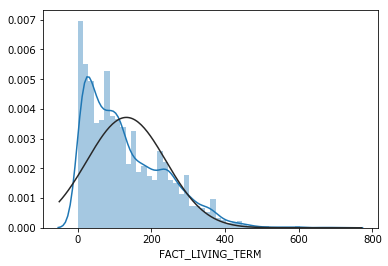

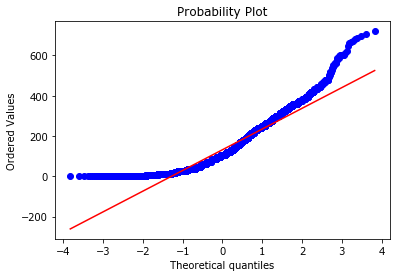

In [24]:
# импортируем библиотеку seaborn, предварительно 
# установив ее в Anaconda Prompt с помощью команды
# conda install -c anaconda seaborn
import seaborn as sns

# импортируем norm и stats
from scipy.stats import norm
from scipy import stats

# строим гистограмму распределения и график
# квантиль-квантиль для переменной FACT_LIVING_TERM
sns.distplot(train['FACT_LIVING_TERM'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['FACT_LIVING_TERM'], plot=plt)

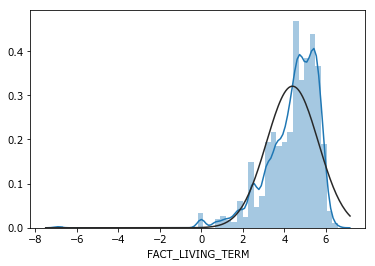

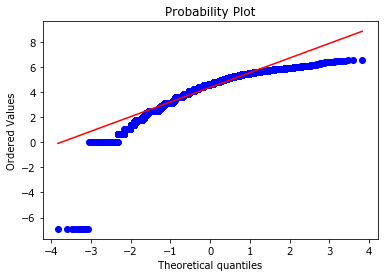

In [25]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной FACT_LIVING_TERM,
# используем константу a, чтобы не брать
# логарифм нуля
a = 0.001
sns.distplot(np.log(train['FACT_LIVING_TERM'] + a), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(train['FACT_LIVING_TERM'] + a), plot=plt)

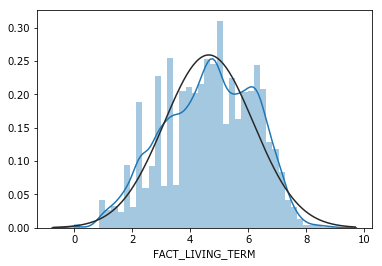

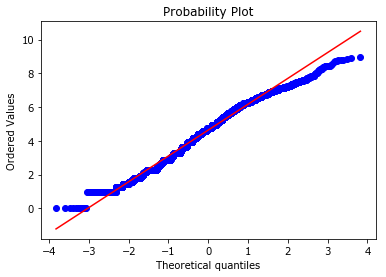

In [26]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной FACT_LIVING_TERM,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['FACT_LIVING_TERM']) * 
             (train['FACT_LIVING_TERM'].abs() ** (1/3)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['FACT_LIVING_TERM']) * 
                     (train['FACT_LIVING_TERM'].abs() ** (1/3)), plot=plt)

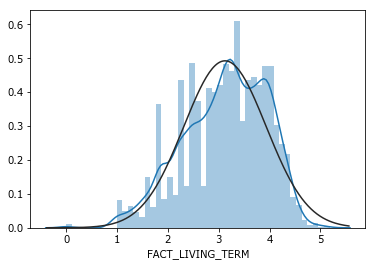

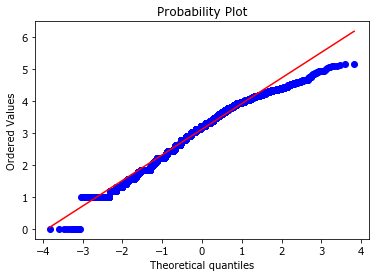

In [27]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# свернутым корнем для переменной FACT_LIVING_TERM, 
# используем модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['FACT_LIVING_TERM']) * 
             np.sqrt(np.sqrt(train['FACT_LIVING_TERM'].abs())), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['FACT_LIVING_TERM']) * 
                     np.sqrt(np.sqrt(train['FACT_LIVING_TERM'].abs())), plot=plt)

## I.9. Биннинг как один из способов конструирования новых признаков, использующий результаты математических вычислений (нужно выполнять только после разбиения на обучение/контроль)

In [28]:
# на основе переменной PERSONAL_INCOME создаем временную переменную 
# PERSONAL_INCOME_CAT, у которой метки категорий будут 
# повторять метки категорий FAMILY_INCOME
bins = [-np.inf, 5000, 10000, 20000, 50000, np.inf]
lab = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 
       'от 20000 до 50000 руб.', 'свыше 50000 руб.']
train['PERSONAL_INCOME_CAT'] = pd.cut(train['PERSONAL_INCOME'], bins, labels=lab)
test['PERSONAL_INCOME_CAT'] = pd.cut(test['PERSONAL_INCOME'], bins, labels=lab)

In [29]:
# выводим метки переменной PERSONAL_INCOME_CAT
train['PERSONAL_INCOME_CAT'].unique()

[от 10000 до 20000 руб., от 20000 до 50000 руб., от 5000 до 10000 руб., до 5000 руб., свыше 50000 руб.]
Categories (5, object): [до 5000 руб. < от 5000 до 10000 руб. < от 10000 до 20000 руб. < от 20000 до 50000 руб. < свыше 50000 руб.]

In [30]:
# создаем переменную PERSONAL_FAMILY_INCOME, которая принимает значение 1, если 
# категория переменной PERSONAL_INCOME_CAT совпадает с категорией 
# переменной FAMILY_INCOME, или 0 в противном случае, затем
# преобразовываем в тип object
train['PERSONAL_FAMILY_INCOME'] = np.where(train['PERSONAL_INCOME_CAT'] == train['FAMILY_INCOME'], 
                                           1, 0).astype('object')
test['PERSONAL_FAMILY_INCOME'] = np.where(test['PERSONAL_INCOME_CAT'] == test['FAMILY_INCOME'], 
                                          1, 0).astype('object')

# удаляем переменную PERSONAL_INCOME_CAT
train.drop('PERSONAL_INCOME_CAT', axis=1, inplace=True)
test.drop('PERSONAL_INCOME_CAT', axis=1, inplace=True)

In [31]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной CREDITCAT
bins = [-np.inf, 7292, 9427, 14169, 27449, np.inf]
# осуществляем биннинг переменной CREDIT и записываем
# результаты в новую переменную CREDITCAT
train['CREDITCAT'] = pd.cut(train['CREDIT'], bins).astype('object')
test['CREDITCAT'] = pd.cut(test['CREDIT'], bins).astype('object')

In [32]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной FSTPAYMENTCAT
bins = [-np.inf, 1500, 4995, np.inf]
# осуществляем биннинг переменной FST_PAYMENT и записываем
# результаты в новую переменную FSTPAYMENTCAT
train['FSTPAYMENTCAT'] = pd.cut(train['FST_PAYMENT'], bins).astype('object')
test['FSTPAYMENTCAT'] = pd.cut(test['FST_PAYMENT'], bins).astype('object')

In [33]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной AGECAT
bins = [-np.inf, 29, 43, 52, 57, np.inf]
# осуществляем биннинг переменной AGE и записываем
# результаты в новую переменную AGECAT
train['AGECAT'] = pd.cut(train['AGE'], bins).astype('object')
test['AGECAT'] = pd.cut(test['AGE'], bins).astype('object')

In [34]:
# пишем функцию, вычисляющую IV по всем 
# количественным предикторам
def numeric_IV(df): 
    iv_list = [] 
    a = 0.0001
    numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object'] 
    for var_name in numerical_columns:         
        df[var_name] = pd.qcut(df[var_name].values, 10, duplicates='drop').codes
        biv = pd.crosstab(df[var_name], df['TARGET'])        
        IV = sum(((1.0 * biv[0] / sum(biv[0]) + a) - (1.0 * biv[1] / sum(biv[1]) + a)) *
                 np.log((1.0 * biv[0] / sum(biv[0]) + a) / (1.0 * biv[1] / sum(biv[1]) + a)))
        iv_list.append(IV)
    col_list = list(numerical_columns)
    results = pd.DataFrame({'Название переменной': col_list, 'IV': iv_list})
    results['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                             if x <= 0.5 and x > 0.3 else 'Средняя'
                             if x <= 0.3 and x > 0.1 else 'Слабая' 
                             if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                             for x in results['IV']]  # по Наиму Сиддики
    return(results.sort_values(by='IV', ascending=False))  

In [35]:
# применяем нашу функцию к обучающему набору
train_copy = train.copy()
numeric_IV(train_copy)

,Название переменной,IV,Полезность
0,AGE,0.136,Средняя
9,WORK_TIME,0.112,Средняя
3,PERSONAL_INCOME,0.096,Слабая
8,FACT_LIVING_TERM,0.060,Слабая
6,TERM,0.052,Слабая
12,LOAN_NUM_PAYM,0.046,Слабая
15,LOAN_AVG_DLQ_AMT,0.042,Слабая
16,LOAN_MAX_DLQ_AMT,0.041,Слабая
7,FST_PAYMENT,0.029,Слабая
5,CREDIT,0.026,Слабая


In [36]:
# пишем функцию, которая создает 
# из списка списков словарь
def list_to_dict(input_list):    
    output_dict = {}    
    for n, sample_list in enumerate(input_list):
        for value in sample_list:
            output_dict[value] = n                
    return output_dict

# создаем список списков для
# переменной GEN_TITLE
map_data_list = [
    ['Рабочий',
     'Служащий',
     'Работник сферы услуг',
     'Другое',
     'Индивидуальный предприниматель',
     'Руководитель низшего звена'],
    ['Специалист',
     'Руководитель среднего звена'],
    ['Не указано'],
    ['Высококвалифиц. специалист', 'Руководитель высшего звена']
]

# создаем из списка списков словарь
map_data_dict = list_to_dict(map_data_list)

# укрупняем категории переменной GEN_TITLE
train['GEN_TITLE'] = train['GEN_TITLE'].map(map_data_dict).astype('object')
test['GEN_TITLE'] = test['GEN_TITLE'].map(map_data_dict).astype('object')

# смотрим результат укрупнения на обучающей выборке
train['GEN_TITLE'].value_counts(dropna=False)

1    5050
0    3459
2    1486
3     661
Name: GEN_TITLE, dtype: int64

In [37]:
# создаем список списков для
# переменной REGION_NM
map_data_list2 = [
    ['ЮЖНЫЙ', 'ЦЕНТРАЛЬНЫЙ 1', 'ЦЕНТРАЛЬНЫЙ 2'],
    ['ЗАПАДНО-СИБИРСКИЙ', 'ВОСТОЧНО-СИБИРСКИЙ', 'УРАЛЬСКИЙ',
     'ДАЛЬНЕВОСТОЧНЫЙ', 'СЕВЕРО-ЗАПАДНЫЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС'],
    ['ПРИВОЛЖСКИЙ']
]

# создаем из списка списков словарь
map_data_dict2 = list_to_dict(map_data_list2)

# на основе укрупнения категорий переменной REGION_NM 
# создадим переменную REGIONCAT
train['REGIONCAT'] = train['REGION_NM'].map(map_data_dict2).astype('object')
test['REGIONCAT'] = test['REGION_NM'].map(map_data_dict2).astype('object')

# смотрим новую переменную в обучающей выборке
train['REGIONCAT'].value_counts(dropna=False)

1    4735
0    4024
2    1897
Name: REGIONCAT, dtype: int64

In [38]:
# создаем список списков для
# переменной ORG_TP_STATE
map_data_list3 = [
    ['Частная компания', 'Индивидуальный предприниматель', 'Некоммерческая организация'],
    ['Не указано'],
    ['Государственная комп./учреж.']
]

# создаем из списка списков словарь
map_data_dict3 = list_to_dict(map_data_list3)

# на основе укрупнения категорий переменной ORG_TP_STATE 
# создаем переменную ORGCAT
train['ORGCAT'] = train['ORG_TP_STATE'].map(map_data_dict3).astype('object')
test['ORGCAT'] = test['ORG_TP_STATE'].map(map_data_dict3).astype('object')

# смотрим новую переменную в обучающей выборке
train['ORGCAT'].value_counts(dropna=False)

0    5169
2    4001
1    1486
Name: ORGCAT, dtype: int64

## I.10. Выполнение преобразований, исходя из информации гистограмм распределения и графиков квантиль-квантиль

In [39]:
# выполняем логарифмическое преобразование
# переменной PERSONAL_INCOME
train['PERSONAL_INCOME'] = np.log(train['PERSONAL_INCOME'] + a)
test['PERSONAL_INCOME'] = np.log(test['PERSONAL_INCOME'] + a)

# выполняем логарифмическое преобразование
# переменной CREDIT
train['CREDIT'] = np.log(train['CREDIT'] + a)
test['CREDIT'] = np.log(test['CREDIT'] + a)

# выполняем логарифмическое преобразование
# переменной WORK_TIME
train['WORK_TIME'] = np.log(train['WORK_TIME'] + a)
test['WORK_TIME'] = np.log(test['WORK_TIME'] + a)

# выполняем преобразование переменной FACT_LIVING_TERM
# кубическим корнем
train['FACT_LIVING_TERM'] = np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/3))
test['FACT_LIVING_TERM'] = np.sign(test['FACT_LIVING_TERM']) * (
    test['FACT_LIVING_TERM'].abs() ** (1/3))

# выполняем логарифмическое преобразование
# переменной LOAN_AVG_DLQ_AMT
train['LOAN_AVG_DLQ_AMT'] = np.log(train['LOAN_AVG_DLQ_AMT'] + a)
test['LOAN_AVG_DLQ_AMT'] = np.log(test['LOAN_AVG_DLQ_AMT'] + a)

## I.11. Конструирование новых признаков

In [40]:
# создаем переменную CHILD_DEP - отношение количества детей (CHILD_TOTAL) 
# к общему количеству детей и иждивенцев (CHILD_TOTAL и DEPENDANTS)
train['CHILD_DEP'] = train['CHILD_TOTAL'] / (train['CHILD_TOTAL'] + train['DEPENDANTS'])
test['CHILD_DEP'] = test['CHILD_TOTAL'] / (test['CHILD_TOTAL'] + test['DEPENDANTS'])

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной
train['CHILD_DEP'] = np.where(train['CHILD_DEP'].isnull(), 0, train['CHILD_DEP'])
test['CHILD_DEP'] = np.where(test['CHILD_DEP'].isnull(), 0, test['CHILD_DEP'])

# если бы наша переменная содержала бесконечные значения, то можно было бы воспользоваться
# train['CHILD_DEP'] = np.where(np.isfinite(train['CHILD_DEP']), train['CHILD_DEP'], 0)  
# т.е. если переменная CHILD_DEP содержит конечное значение, 
# возвращаем исходное значение, если она содержит бесконечное
# значение, возвращаем значение 0

# создаем переменную PAYMENT - сумму ежемесячного взноса
# по кредиту, разделив сумму кредита (CREDIT)
# на срок кредита (TERM)
train['PAYMENT'] = np.log((train['CREDIT'] / train['TERM']) + a)
test['PAYMENT'] = np.log((test['CREDIT'] / test['TERM']) + a)

# создаем переменную PTI - коэффициент долговой нагрузки, 
# разделив сумму ежемесячного взноса по кредиту (PAYMENT)
# на личный доход (PERSONAL_INCOME)
train['PTI'] = train['PAYMENT'] / train['PERSONAL_INCOME']
test['PTI'] = test['PAYMENT'] / test['PERSONAL_INCOME']

# создаем переменную CLOSED_TO_TOTAL - коэффициент погашения ссуд, 
# разделив количество погашенных ссуд (LOAN_NUM_CLOSED)
# на общее количество ссуд (LOAN_NUM_TOTAL)
train['CLOSED_TO_TOTAL'] = train['LOAN_NUM_CLOSED'] / train['LOAN_NUM_TOTAL']
test['CLOSED_TO_TOTAL'] = test['LOAN_NUM_CLOSED'] / test['LOAN_NUM_TOTAL']

# создаем переменную PAYM_TO_LOAN– отношение количества 
# платежей (LOAN_NUM_PAYM) к общему количеству ссуд (LOAN_NUM_TOTAL)
train['PAYM_TO_LOAN'] = train['LOAN_NUM_PAYM'] / train['LOAN_NUM_TOTAL']
test['PAYM_TO_LOAN'] = test['LOAN_NUM_PAYM'] / test['LOAN_NUM_TOTAL']

# создаем переменную DLQ_TO_PAYM – отношение количества просрочек 
# (LOAN_DLQ_NUM) к общему количеству платежей (LOAN_NUM_PAYM)
train['DLQ_TO_PAYM'] = train['LOAN_DLQ_NUM'] / train['LOAN_NUM_PAYM']
test['DLQ_TO_PAYM'] = test['LOAN_DLQ_NUM'] / test['LOAN_NUM_PAYM']

# создаем переменную FST_SHARE - отношение суммы первого платежа по кредиту
# к объединенной сумме первого платежа (FST_PAYMENT) и кредита (CREDIT) 
train['FST_SHARE'] = train['FST_PAYMENT'] / (train['FST_PAYMENT'] + train['CREDIT'])
test['FST_SHARE'] = test['FST_PAYMENT'] / (test['FST_PAYMENT'] + test['CREDIT'])

# создаем DLQ_TIME - индекс времени наступления максимальной просрочки, 
# разделив номер максимальной просрочки (LOAN_MAX_DLQ) 
# на количество просрочек (LOAN_DLQ_NUM)
train['DLQ_TIME'] = train['LOAN_MAX_DLQ'] / train['LOAN_DLQ_NUM']
test['DLQ_TIME'] = test['LOAN_MAX_DLQ'] / test['LOAN_DLQ_NUM']

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной                     
train['DLQ_TIME'] = np.where(train['DLQ_TIME'].isnull(), 0, train['DLQ_TIME'])
test['DLQ_TIME'] = np.where(test['DLQ_TIME'].isnull(), 0, test['DLQ_TIME'])

# создаем переменную LOAN_MAX_DLQ_RANGE - разницу между максимальной суммой
# просрочки (LOAN_MAX_DLQ_AMT) и средней суммой просрочки (LOAN_AVG_DLQ_AMT)
train['LOAN_MAX_DLQ_RANGE'] = ((train['LOAN_MAX_DLQ_AMT'] - train['LOAN_AVG_DLQ_AMT']) / 
                               train['LOAN_AVG_DLQ_AMT']).abs()
test['LOAN_MAX_DLQ_RANGE'] = ((test['LOAN_MAX_DLQ_AMT'] - test['LOAN_AVG_DLQ_AMT']) / 
                              test['LOAN_AVG_DLQ_AMT']).abs()

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной
train['LOAN_MAX_DLQ_RANGE'] = np.where(train['LOAN_MAX_DLQ_RANGE'].isnull(), 0, 
                                       train['LOAN_MAX_DLQ_RANGE'])
test['LOAN_MAX_DLQ_RANGE'] = np.where(test['LOAN_MAX_DLQ_RANGE'].isnull(), 0, 
                                      test['LOAN_MAX_DLQ_RANGE'])

## I.12. Стандартизация

In [41]:
# выполняем стандартизацию количественных переменных
num_cols = [c for c in train.columns if train[c].dtype.name != 'object']
train_copy = train.copy()
for i in num_cols:    
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

In [42]:
# выводим информацию об общем количестве пропущенных 
# наблюдений в обучающей и контрольной выборках
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


## I.13. Дамми-кодирование

In [43]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'CREDIT', 'TERM', 'FST_PAYMENT', 'GPF_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED', 'FACT_TP_FL', 'AUTO_FOR_FL', 'GENDER+GAR_PRESENCE_FL', 'REG_FACT_FL+GAR_PRESENCE_FL', 'PERSONAL_FAMILY_INCOME', 'CREDITCAT', 'FSTPAYM

## I.14. Подготовка массивов признаков и массивов меток зависимой переменной

In [44]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'TARGET_1']
y_test = test_dummies.loc[:, 'TARGET_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
train_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
test_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'AGE':'ORGCAT_2']
X_test = test_dummies.loc[:, 'AGE':'ORGCAT_2']

## I.15. Построение логистической регрессии с помощью класса LogisticRegression библиотеки scikit-learn

In [45]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression

In [46]:
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
# строим логистическую регрессию
logreg = LogisticRegression().fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.747
AUC на контрольной выборке: 0.691


In [47]:
# строим логистическую регрессию,
# используем l1-регуляризацию (лассо), которая
# устанавливают некоторые оценки коэффициентов 
# регрессии точно в нуле и тем самым осуществляет 
# отбор переменных
logreg = LogisticRegression(C=0.12, penalty='l1').fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.723
AUC на контрольной выборке: 0.701


## I.16. Настройка гиперпараметров логистической регрессии с помощью класса GridSearchCV

In [48]:
# импортируем класс StratifiedKFold для выполнения
# статифицированной перекрестной проверки (т.е. в
# каждом блоке соблюдаются исходные пропорции классов)
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold, 10-блочную
# перекрестную проверку со случайным перемешиванием данных
strat = StratifiedKFold(n_splits=10, shuffle=True, 
                        random_state=42)
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(penalty='l1', random_state=42)
# задаем сетку гиперпараметров, будем перебирать 
# разные значения штрафа
param_grid = {'C': [0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32]}

In [49]:
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid, 
                           scoring='roc_auc', 
                           return_train_score=True,
                           n_jobs=-1, cv=strat)
# запускаем решетчатый поиск
grid_search.fit(X_train, y_train)
# проверяем модель со значением гиперпараметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.701
Наилучшее значение гиперпараметра C: {'C': 0.2}
Наилучшее значение AUC: 0.704


In [50]:
# преобразуем результаты поиска в датафрейм
# и выведем их
results = pd.DataFrame(grid_search.cv_results_)
table = results.pivot_table(values=['mean_test_score'], 
                            index=['param_C'])
print(table)

         mean_test_score
param_C                 
0.180              0.704
0.200              0.704
0.220              0.704
0.240              0.704
0.260              0.704
0.280              0.703
0.300              0.703
0.320              0.703


## I.17. Отбор признаков для логистической регрессии с помощью случайного леса (класса RFE)

### I.17.1. Отбор признаков для логистической регрессии с помощью случайного леса (класса RFE)

In [51]:
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# импортируем класс RFE
from sklearn.feature_selection import RFE
# создаем экземпляр класса RFE, отберем первые 100 переменных 
# с помощью случайного леса
select = RFE(RandomForestClassifier(n_estimators=200, max_depth=10, 
                                    random_state=42, n_jobs=-1),
             n_features_to_select=100)
# обучаем модель и применяем к нашим массивам
select.fit(X_train, y_train)
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [52]:
# смотрим форму массива
print("Форма исходного обучающего массива: {}".format(str(X_train_rfe.shape)))
print("Форма исходного тестового массива: {}".format(str(X_test_rfe.shape)))

Форма исходного обучающего массива: (10656, 100)
Форма исходного тестового массива: (4567, 100)


In [53]:
# взглянем, какие переменные были отобраны
mask = select.get_support()
feat_labels = X_train.columns
for c, feature in zip(mask, feat_labels):
    print(feature, c)
    
# можно было еще воспользоваться вот таким программным кодом:
# for i, (a, b) in enumerate(zip(feat_labels, mask)): print(i, a, b)

AGE True
CHILD_TOTAL True
DEPENDANTS True
PERSONAL_INCOME True
OWN_AUTO True
CREDIT True
TERM True
FST_PAYMENT True
FACT_LIVING_TERM True
WORK_TIME True
LOAN_NUM_TOTAL True
LOAN_NUM_CLOSED True
LOAN_NUM_PAYM True
LOAN_DLQ_NUM True
LOAN_MAX_DLQ True
LOAN_AVG_DLQ_AMT True
LOAN_MAX_DLQ_AMT True
PREVIOUS_CARD_NUM_UTILIZED True
CHILD_DEP True
PAYMENT True
PTI True
CLOSED_TO_TOTAL True
PAYM_TO_LOAN True
DLQ_TO_PAYM True
FST_SHARE True
DLQ_TIME True
LOAN_MAX_DLQ_RANGE True
SOCSTATUS_WORK_FL_0 False
SOCSTATUS_WORK_FL_1 False
SOCSTATUS_PENS_FL_0 False
SOCSTATUS_PENS_FL_1 False
GENDER_0 True
GENDER_1 True
EDUCATION_Высшее True
EDUCATION_Неоконченное высшее True
EDUCATION_Неполное среднее False
EDUCATION_Среднее True
EDUCATION_Среднее специальное True
MARITAL_STATUS_Вдовец/Вдова False
MARITAL_STATUS_Гражданский брак True
MARITAL_STATUS_Не состоял в браке True
MARITAL_STATUS_Разведен(а) True
MARITAL_STATUS_Состою в браке True
GEN_INDUSTRY_Банк/Финансы False
GEN_INDUSTRY_Государственная служба Fals

### I.17.2. Построение логистической регрессии по массиву признаков, отобранных с помощью случайного леса (класса RFE)

In [54]:
logreg = LogisticRegression().fit(X_train_rfe, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_rfe)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_rfe)[:, 1])))

AUC на обучающей выборке: 0.724
AUC на контрольной выборке: 0.699


### I.17.3. Настройка гиперпараметров логистической регрессии с помощью решетчатого поиска на массиве признаков, отобранных с помощью случайного леса (класса RFE)

In [55]:
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid2 = LogisticRegression(penalty='l1', random_state=42)
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
param_grid2 = {'C': [0.1, 0.12, 0.14, 0.16, 0.18, 0.20]}
# создаем экземпляр класса GridSearchCV
grid_search2 = GridSearchCV(logreg_grid2, param_grid2, 
                            scoring='roc_auc', 
                            n_jobs=-1, cv=strat)
# запускаем решетчатый поиск
grid_search2.fit(X_train_rfe, y_train)
# проверяем модель со значением гиперпараметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search2.predict_proba(X_test_rfe)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search2.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search2.best_score_))

AUC на тестовой выборке: 0.702
Наилучшее значение гиперпараметра C: {'C': 0.2}
Наилучшее значение AUC: 0.703


## I.18. Отбор признаков для логистической регрессии с помощью BorutaPy

### I.18.1. Отбор признаков для логистической регрессии с помощью BorutaPy (на основе случайного леса)

In [56]:
# устанавливаем пакет boruta в Anaconda Promt
# с помощью строки pip install Boruta
# импортируем класс BorutaPy
from boruta import BorutaPy

In [57]:
# создаем экземпляр класса RandomForestClassifier,
# задаем модель леса с 50 деревьями глубиной 10
rf = RandomForestClassifier(n_estimators=50, max_depth=10, 
                            random_state=42, n_jobs=-1)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [58]:
# создаем экземпляр класса BorutaPy, т.е. задаем модель BorutaPy
boruta_selector = BorutaPy(rf, n_estimators=10, 
                           verbose=2, alpha=0.06, 
                           perc=10, max_iter=50, 
                           random_state=42)
boruta_selector

BorutaPy(alpha=0.06,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
     max_iter=50, n_estimators=10, perc=10, random_state=42, two_step=True,
     verbose=2)

In [59]:
# обучаем модель Boruta, отбирая с помощью случайного леса предикторы
boruta_selector.fit(X_train.values, y_train.values)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	451
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	451
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	451
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	451
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	451
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	451
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	95
Tentative: 	356
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	95
Tentative: 	356
Rejected: 	0
Iteration: 	9 / 50
Confirmed: 	95
Tentative: 	356
Rejected: 	0
Iteration: 	10 / 50
Confirmed: 	95
Tentative: 	356
Rejected: 	0
Iteration: 	11 / 50
Confirmed: 	95
Tentative: 	351
Rejected: 	5
Iteration: 	12 / 50
Confirmed: 	118
Tentative: 	328
Rejected: 	5
Iteration: 	13 / 50
Confirmed: 	118
Tentative: 	328
Rejected: 	5
Iteration: 	14 / 50
Confirmed: 	118
Tentative: 	319
Rejected: 	14
Iteration: 	15 / 50
Confirmed: 	130
Tentative: 	307
Rejected: 	14
Iteration: 	16 / 50
Confirmed: 	130
Tentative: 	3

BorutaPy(alpha=0.06,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x0000027A9A1ED3A8>,
            verbose=0, warm_start=False),
     max_iter=50, n_estimators=10, perc=10,
     random_state=<mtrand.RandomState object at 0x0000027A9A1ED3A8>,
     two_step=True, verbose=2)

In [60]:
# преобразуем данные с помощью модели BorutaPy, то есть 
# фильтруем предикторы согласно обученной модели BorutaPy
X_train_boruta = boruta_selector.transform(X_train.values)
X_test_boruta = boruta_selector.transform(X_test.values)
# смотрим форму массива
print("Форма исходного обучающего массива: {}".format(str(X_train_boruta.shape)))
print("Форма исходного контрольного массива: {}".format(str(X_test_boruta.shape)))

Форма исходного обучающего массива: (10656, 172)
Форма исходного контрольного массива: (4567, 172)


### I.18.2. Построение логистической регрессии по массиву признаков, отобранных с помощью BorutaPy (на основе случайного леса)

In [61]:
logreg = LogisticRegression().fit(X_train_boruta, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_boruta)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_boruta)[:, 1])))

AUC на обучающей выборке: 0.731
AUC на контрольной выборке: 0.703


### I.18.3. Настройка гиперпараметров логистической регрессии с помощью решетчатого поиска по массиву признаков, отобранных с помощью BorutaPy (на основе случайного леса)

In [62]:
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid3 = LogisticRegression(penalty='l1', random_state=42)
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
param_grid3 = {'C': [1.0, 0.9, 0.8, 0.7, 0.6]}
# создаем экземпляр класса GridSearchCV
grid_search3 = GridSearchCV(logreg_grid3, param_grid3, 
                            scoring='roc_auc', 
                            n_jobs=-1, cv=strat)
# запускаем решетчатый поиск
grid_search3.fit(X_train_boruta, y_train)
# проверяем модель со значением гиперпараметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search3.predict_proba(X_test_boruta)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search3.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search3.best_score_))

AUC на тестовой выборке: 0.705
Наилучшее значение гиперпараметра C: {'C': 0.6}
Наилучшее значение AUC: 0.702


## I.19. Проблема дисбаланса классов
Нередко возникают ситуации, когда в обучающем наборе данных доля примеров некоторого класса слишком мала (этот класс будем называть миноритарным, а другой, сильно представленный, — мажоритарным). Такие тенденции хорошо заметны в кредитном скоринге, в медицине, в директ-маркетинге. Качество такого классификатора может оказаться невысоким.

Кроме того, нужно учитывать стоимости ошибочной классификации. Часто неверная классификация примеров миноритарного класса (например, "плохих" заемщиков), как правило, обходится в разы дороже, чем ошибочная классификация примера мажоритарного класса.

Давайте взглянем на распределение классов зависимой переменной в обучающей выборке.

In [63]:
# смотрим распределение классов зависимой переменной 
# в обучающей выборке (относительные частоты)
print(y_train.value_counts(normalize=True))

0   0.885
1   0.115
Name: TARGET_1, dtype: float64


In [64]:
# смотрим распределение классов зависимой переменной 
# в обучающей выборке (абсолютные частоты)
print(y_train.value_counts())

0    9426
1    1230
Name: TARGET_1, dtype: int64


### I.19.1. Изменение весов классов

Первая стратегия - увеличить вес миноритарного класса.

In [65]:
from sklearn.model_selection import cross_val_score

best_score = 0

for class_weight in ['balanced', {0:0.70, 1:0.30}, {0:0.75, 1:0.25}, 
                     {0:0.80, 1:0.20}, {0:0.85, 1:0.15}]:
    # для разных пропорций классов, задаваемых class_weight, 
    # обучаем логистическую регрессию
    logreg = LogisticRegression(class_weight=class_weight, 
                                random_state=42)
    logreg.fit(X_train, y_train)
    scores = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv=strat)
    # вычисляем среднее значение AUC перекрестной проверки 
    auc_score = np.mean(scores)
    # если получаем лучшее значение AUC, сохраняем его и значение гиперпараметра
    if auc_score > best_score:
        best_score = auc_score
        best_parameters = {'class_weight': class_weight}
# строим модель со значением гиперпараметра class_weight, давшим наилучшее 
# значение AUC на обучающей выборке
logreg_best = LogisticRegression(**best_parameters)
logreg_best.fit(X_train, y_train)
# проверяем качество модели на котрольной выборке
test_score = roc_auc_score(y_test, logreg_best.predict_proba(X_test)[:, 1])
print("Лучшее усредненное значение AUC cv: {:.2f}".format(best_score))
print("Наилучшее значение гиперпараметра class_weight: ", best_parameters)
print("AUC модели на тестовой выборке: {:.2f}".format(test_score))

Лучшее усредненное значение AUC cv: 0.70
Наилучшее значение гиперпараметра class_weight:  {'class_weight': {0: 0.85, 1: 0.15}}
AUC модели на тестовой выборке: 0.69


### I.19.2. Семплинг

Вторая стратегия заключается в использовании семплинга. В первом случае удаляют некоторое количество примеров мажоритарного класса (undersampling), во втором – увеличивают количество примеров миноритарного (oversampling). В свою очередь стратегии undersampling/oversampling подразделяют на две группы: случайные и специальные.

Все эти техники сэмплирования (как over, так и under, а также их комбинации) можно осуществить с помощью библиотеки `imbalanced-learn`.

#### I.19.2.1. Случайное удаление примеров мажоритарного класса (Random Undersampling)

Для этого рассчитывается K - количество мажоритарных примеров, которое необходимо удалить для достижения требуемого уровня соотношения различных классов. Затем случайным образом выбираются K мажоритарных примеров и удаляются. Давайте попробуем применить эту стратегию с помощью класса `RandomUnderSampler` библиотеки `imbalanced-learn`.

In [66]:
# импортируем класс RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

#### `Параметры класса RandomUnderSampler`

- **`ratio`** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Например, если задать `ratio={0:9000, 1:1230}`, то применительно к нашему случаю мы оставляем все примеры миноритарного класса (1230), а из исходных 9426 наблюдений мажоритарного класса удаляем 426 наблюдений, оставив 9000 наблюдений. Значение `majority` выполняет семплинг мажоритарного класса. Значение `all` выполняет семплинг всех классов. Однако наилучшее качество обычно дает тонкая настройка с помощью словаря;
- **`random_state`** – задает стартовое значение генератора случайных чисел для воспроизводимости.

In [67]:
# создаем экземпляр класса RandomUnderSampler, мы случайно удалим
# 426 наблюдений мажоритарного класса
rus = RandomUnderSampler(ratio={0:9000, 1:1230}, random_state=42)

In [68]:
# обучаем модель RandomUnderSampler, т.е. выполняем семплинг, 
# создав новый обучающий массив признаков и обучающий
# массив меток
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)

In [69]:
# на семплированных наборах данных строим модель логистической регрессии
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
# на наборе, не участвовавшем в семплировании, проверяем качество
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.748
AUC на контрольной выборке: 0.691


Примеры из мажоритарного класса могут удаляться не только случайным образом, но и по определенным правилам. Одной из таких стратегий являются связи Томека.

#### I.19.2.2. Связи Томека
Пусть примеры $E_i$ и $E_j$ принадлежат к различным классам, $d(E_i,E_j)$ – расстояние между указанными примерами. Пара $(E_i,E_j)$ называется связью Томека, если не найдется ни одного примера $E_l$ такого, что будет справедлива совокупность неравенств:

$d(E_i,E_l)<d(E_i,E_j)$ и $d(E_j,E_l)<d(E_i,E_j)$

Согласно данному подходу, все мажоритарные записи, входящие в связи Томека, должны быть удалены из набора данных. Этот способ хорошо удаляет записи, которые можно рассматривать в качестве «зашумляющих». Давайте попробуем применить эту стратегию с помощью класса `TomekLinks` библиотеки `imbalanced-learn`.

In [70]:
# импортируем класс TomekLinks
from imblearn.under_sampling import TomekLinks

#### `Параметры класса TomekLinks`

- **`ratio`** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Значение `majority` выполняет семплинг мажоритарного класса. Значение `all` выполняет семплинг всех классов;
- **`random_state`** – задает стартовое значение генератора случайных чисел для воспроизводимости;
- **`n_jobs`** – задает количество ядер процессора (по умолчанию значение `1`).

In [71]:
# создаем экземпляр класса TomekLinks
tomek = TomekLinks(ratio='majority', random_state=42, n_jobs=-1)
# обучаем модель TomekLinks, т.е. выполняем семплинг, 
# создав новые наборы данных
X_resampled, y_resampled = tomek.fit_sample(X_train, y_train)
# на семплированных наборах данных строим модель логистической регрессии
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.752
AUC на контрольной выборке: 0.692


#### I.19.2.3. Случайное дублирование примеров миноритарного класса (Random Oversampling)

Самый простой метод – это случайное дублирование примеров миноритарного класса. В зависимости от того, какое соотношение классов необходимо, выбирается количество случайных записей для дублирования. Давайте попробуем применить эту стратегию с помощью класса `RandomOverSampler` библиотеки `imbalanced-learn`.

In [72]:
# импортируем класс RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

#### `Параметры класса RandomOverSampler`

- **`ratio`** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Например, если задать `ratio={0:9426, 1:1300}`, то применительно к нашему случаю мы оставляем все примеры мажоритарного класса (9426), а из исходных 1230 наблюдений миноритарного класса создаем 1300 наблюдений путем дублирования. Значение `minority` выполняет семплинг миноритарного класса. Значение `all` выполняет семплинг всех классов. Однако наилучшее качество обычно дает тонкая настройка с помощью словаря;
- **`random_state`** – задает стартовое значение генератора случайных чисел для воспроизводимости.

In [73]:
# создаем экземпляр класса RandomOverSampler
ros = RandomOverSampler(ratio={0:9426, 1:1300}, random_state=42)
# обучаем модель RandomOverSampler, т.е. выполняем семплинг, 
# создав новые наборы данных
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.749
AUC на контрольной выборке: 0.690


#### I.19.2.4. SMOTE

SMOTE (Syntetic Minority Oversampling Technique – оверсемплинг за счет создания синтетических примеров миноритарного класса) генерирует синтетические примеры миноритарного класса, чтобы увеличить долю миноритарного класса в выборке. Для каждого примера миноритарного класса мы вычисляем его $k$ ближайших соседей (обычно $k$=5) и затем из них случайным образом выбираем некоторые примеры в соответствии с нашим уровнем оверсемплинга. После этого вдоль линий, соединяющих пример миноритарного класса с его выбранными ближайшими соседями генерируются новые синтетические примеры. 

Давайте попробуем применить стратегию SMOTE c помощью класса `SMOTE` библиотеки `imbalanced-learn`.

In [74]:
# импортируем класс SMOTE
from imblearn.over_sampling import SMOTE

#### `Параметры класса SMOTE`

- **`ratio`** – соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Значение `minority` выполняет семплинг миноритарного класса. Значение `majority` выполняет семплинг мажоритарного класса.
- **`kind`** – тип алгоритма SMOTE. Можно задать значения `regular` (по умолчанию), `borderline1`, `borderline2`, `svm`. Чаще всего значения `borderline1` и `borderline2` дают лучшее качество;
- **`k_neighbors`** – количество ближайших соседей для создания синтетических примеров (по умолчанию значение `5`);
- **`m_neighbors`** – количество ближайших соседей, которое требуется, чтобы определить, находится ли пример миноритарного класса в ОПАСНОЙ ЗОНЕ. Используется только со значениями `kind={'borderline1', 'borderline2', 'svm'}`;
- **`random_state`** – задает стартовое значение генератора случайных чисел для воспроизводимости;
- **`n_jobs`** – задает количество ядер процессора (по умолчанию значение `1`).

In [75]:
# применяем  borderline-SMOTE2
smote = SMOTE(random_state=152, kind='borderline2', 
              n_jobs=-1)
X_smote, y_smote = smote.fit_sample(X_train, y_train)
logreg = LogisticRegression().fit(X_smote, y_smote)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_smote, logreg.predict_proba(X_smote)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.775
AUC на контрольной выборке: 0.686


## ЭТАП II. ПОСТРОЕНИЕ МОДЕЛИ НА ВСЕЙ ИСТОРИЧЕСКОЙ ВЫБОРКЕ И ПРИМЕНЕНИЕ К НОВЫМ ДАННЫМ

## II.1. Считывание CSV-файла, содержащего исторические данные, в объект DataFrame

In [76]:
# загружаем набор данных
data = pd.read_csv('Data/Credit_OTP.csv', encoding='cp1251', sep=';')

## II.2. Предварительная обработка исторических данных

In [77]:
# пишем функцию, выполняющую предварительную обработку
# исторических данных
def preprocessing(df):
    # удаляем идентификационную переменную AGREEMENT_RK,
    # потому что у нее количество уникальных значений
    # равно количеству наблюдений
    df.drop('AGREEMENT_RK', axis=1, inplace=True)
    
    # удаляем переменную DL_DOCUMENT_FL, потому что 
    # у нее одно уникальное значение
    df.drop('DL_DOCUMENT_FL', axis=1, inplace=True)
    
    # преобразуем указанные переменные в тип object
    for i in ['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER',
              'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 
              'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 
              'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 
              'LAND_PRESENCE_FL', 'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 
              'REG_PHONE_FL', 'GEN_PHONE_FL']:
        df[i] = df[i].astype('object') 
    
    # в указанных переменных заменяем запятую на точку в качестве
    # десятичного разделителя и преобразуем в тип float
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 
              'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df[i] = df[i].str.replace(',', '.').astype('float')
    
    
    # если в интересующей нас переменной есть пропуск 
    # и при этом переменная SOCSTATUS_PENS_FL имеет значение 1,
    # заменяем такие пропуски меткой "Не указано"
    df['GEN_INDUSTRY'] = np.where(df['GEN_INDUSTRY'].isnull() \
                                  | (df['SOCSTATUS_PENS_FL'] == 1), 
                                  'Не указано', df['GEN_INDUSTRY'])
    df['GEN_TITLE'] = np.where(df['GEN_TITLE'].isnull() \
                               | (df['SOCSTATUS_PENS_FL'] == 1), 
                               'Не указано', df['GEN_TITLE'])
    df['ORG_TP_STATE'] = np.where(df['ORG_TP_STATE'].isnull() \
                                  | (df['SOCSTATUS_PENS_FL'] == 1),
                                  'Не указано', df['ORG_TP_STATE'])
    df['ORG_TP_FCAPITAL'] = np.where(df['ORG_TP_FCAPITAL'].isnull() \
                                     | (df['SOCSTATUS_PENS_FL'] == 1), 
                                     'Не указано', df['ORG_TP_FCAPITAL'])

    # заменяем пропуски в указанных переменных
    # меткой "Не указано"
    df['JOB_DIR'] = np.where(df['JOB_DIR'].isnull(), 'Не указано', df['JOB_DIR'])    
    df['REGION_NM'] = np.where(df['REGION_NM'].isnull(), 'Не указано', df['REGION_NM'])
    
    # пропуски в переменной TP_PROVINCE заменим значением
    # переменной FACT_ADDRESS_PROVINCE
    df['TP_PROVINCE'] = np.where(df['TP_PROVINCE'].isnull(), 
                                 df['FACT_ADDRESS_PROVINCE'], df['TP_PROVINCE'])
    
    # заменяем пропуски в переменной 
    # PREVIOUS_CARD_NUM_UTILIZED нулями
    df['PREVIOUS_CARD_NUM_UTILIZED'] = np.where(df['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 0, 
                                                df['PREVIOUS_CARD_NUM_UTILIZED'])
    
    # заменяем категорию "Не указано" на категорию "ЮЖНЫЙ"
    df['REGION_NM'] = np.where(df['REGION_NM'] == 'Не указано', 'ЮЖНЫЙ', df['REGION_NM'])
    
    # заменяем неверную категорию "ПОВОЛЖСКИЙ" на категорию "ПРИВОЛЖСКИЙ"
    df.at[df['REGION_NM'] == 'ПОВОЛЖСКИЙ', 'REGION_NM'] = 'ПРИВОЛЖСКИЙ'
    
    # записываем редкие категории в одну отдельную категорию
    for i in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
        df[i] = np.where((df[i] == 'Москва') \
                         | (df[i] == 'Хакасия') \
                         | (df[i] == 'Ямало-Ненецкий АО') \
                         | (df[i] == 'Магаданская область') \
                         | (df[i] == 'Калмыкия') \
                         | (df[i] == 'Дагестан') \
                         | (df[i] == 'Агинский Бурятский АО') \
                         | (df[i] == 'Усть-Ордынский Бурятский АО') \
                         | (df[i] == 'Эвенкийский АО') \
                         | (df[i] == 'Коми-Пермяцкий АО') \
                         | (df[i] == 'Чечня'), 
                         'ДРУГОЕ', df['REG_ADDRESS_PROVINCE'])


    df['TP_PROVINCE'] = np.where((df['TP_PROVINCE'] == 'Сахалинская область') \
                                 | (df['TP_PROVINCE'] == 'Еврейская АО') \
                                 | (df['TP_PROVINCE'] == 'Магаданская область') \
                                 | (df['TP_PROVINCE'] == 'Дагестан') \
                                 | (df['TP_PROVINCE'] == 'Кабардино-Балкария'), 
                                 'ДРУГОЕ', df['TP_PROVINCE'])
    
    # укрупняем категории переменной EDUCATION
    df.at[df['EDUCATION'] == 'Ученая степень', 'EDUCATION'] = 'Высшее'
    df.at[df['EDUCATION'] == 'Два и более высших образования', 
          'EDUCATION'] = 'Высшее'

    # записываем некоторые категории переменной GEN_INDUSTRY 
    # в отдельную категорию
    df.at[df['GEN_INDUSTRY'] == 'Юридические услуги/нотариальные услуги', 
          'GEN_INDUSTRY'] = 'Другие сферы'
    df.at[df['GEN_INDUSTRY'] == 'Страхование', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.at[df['GEN_INDUSTRY'] == 'Туризм', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.at[df['GEN_INDUSTRY'] == 'Недвижимость', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.at[df['GEN_INDUSTRY'] == 'Управляющая компания', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.at[df['GEN_INDUSTRY'] == 'Логистика', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.at[df['GEN_INDUSTRY'] == 'Подбор персонала', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.at[df['GEN_INDUSTRY'] == 'Маркетинг', 'GEN_INDUSTRY'] = 'Другие сферы'
    
    # укрупняем категории переменной GEN_TITLE
    df.at[df['GEN_TITLE'] == 'Партнер', 'GEN_TITLE'] = 'Другое'
    df.at[df['GEN_TITLE'] == 'Военнослужащий по контракту', 'GEN_TITLE'] = 'Другое'
    
    # укрупняем категории переменной ORG_TP_STATE
    df.at[df['ORG_TP_STATE'] == 'Частная ком. с инос. капиталом', 
          'ORG_TP_STATE'] = 'Частная компания'
    
    # укрупняем категории переменной JOB_DIR
    df.at[df['JOB_DIR'] == 'Реклама и маркетинг', 'JOB_DIR'] = 'Другое'
    df.at[df['JOB_DIR'] == 'Кадровая служба и секретариат', 'JOB_DIR'] = 'Другое'
    df.at[df['JOB_DIR'] == 'Пр-техн. обесп. и телеком.', 'JOB_DIR'] = 'Другое'
    df.at[df['JOB_DIR'] == 'Юридическая служба', 'JOB_DIR'] = 'Другое'
    
    # создаем переменную FACT_TP_FL, которая принимает значение 1, если 
    # область фактического пребывания клиента и область торговой точки, 
    # где клиент брал последний кредит, совпадают, или 0
    # в противном случае
    df['FACT_TP_FL'] = np.where(df['FACT_ADDRESS_PROVINCE'] == df['TP_PROVINCE'], 
                                1, 0).astype('object')
    
    # создаем переменную AUTO_FOR_FL, которая принимает значение 1,
    # если у клиента – импортный автомобиль, или 0 в противном случае
    df['AUTO_FOR_FL'] = np.where((df['AUTO_RUS_FL'] == '0') & (df['OWN_AUTO'] > 0), 
                                 1, 0).astype('object')
    
    # создаем переменные - результаты конъюнкций
    df['GENDER+GAR_PRESENCE_FL'] = df.apply(
        lambda x: f"{x['GENDER']} + {x['GAR_PRESENCE_FL']}",
        axis=1)
    df['REG_FACT_FL+GAR_PRESENCE_FL'] = df.apply(
        lambda x: f"{x['REG_FACT_FL']} + {x['GAR_PRESENCE_FL']}",
        axis=1)
           
    # значения переменной FACT_LIVING_TERM берем по модулю, чтоб 
    # избавиться от отрицательных значений
    df['FACT_LIVING_TERM'] = df['FACT_LIVING_TERM'].abs()
    
    # наблюдения, в которых количество лет проживания 
    # по месту фактического пребывания, превышает
    # возраст, записываем как пропуски 
    df['FACT_LIVING_TERM'] = np.where(df['FACT_LIVING_TERM'] / 12 > df['AGE'], 
                                      np.NaN, df['FACT_LIVING_TERM'])
    
    # импутируем пропуски медианой
    df['FACT_LIVING_TERM'].fillna(df['FACT_LIVING_TERM'].median(), inplace=True)
    
    # наблюдения, в которых время работы в годах превышает 
    # возраст (например, человек работает 40 лет, а живет 
    # всего 25), записываем как пропуски 
    df['WORK_TIME'] = np.where(df['WORK_TIME'] / 12 > df['AGE'], 
                               np.NaN, df['WORK_TIME'])
    
    # наблюдения, в которых разница между возрастом и временем работы в годах 
    # меньше 16 (например, у 30-летнего время работы в годах составляет 20 лет,
    # получается, он работает с 10 лет), записываем как пропуски 
    df['WORK_TIME'] = np.where((df['AGE'] - df['WORK_TIME'] / 12) < 16, 
                               np.NaN, df['WORK_TIME'])
    
    # импутируем пропуски в переменной WORK_TIME медианой
    df['WORK_TIME'].fillna(df['WORK_TIME'].median(), inplace=True)
    
    # на основе переменной PERSONAL_INCOME создаем переменную 
    # PERSONAL_INCOME_CAT, у которой метки категорий будут 
    # повторять метки категорий FAMILY_INCOME
    bins = [-np.inf, 5000, 10000, 20000, 50000, np.inf]
    lab = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 
           'от 20000 до 50000 руб.', 'свыше 50000 руб.']
    df['PERSONAL_INCOME_CAT'] = pd.cut(df['PERSONAL_INCOME'], bins, labels=lab) 
    
    # создаем переменную PERSONAL_FAMILY_INCOME, которая принимает значение 1, если 
    # категория переменной PERSONAL_INCOME_CAT совпадает с категорией 
    # переменной FAMILY_INCOME, или 0 в противном случае, затем
    # преобразовываем в тип object
    df['PERSONAL_FAMILY_INCOME'] = np.where(df['PERSONAL_INCOME_CAT'] == df['FAMILY_INCOME'], 
                                            1, 0).astype('object')
    
    # удаляем переменную PERSONAL_INCOME_CAT
    df.drop('PERSONAL_INCOME_CAT', axis=1, inplace=True)
      
    # задаем точки, в которых будут находится границы категорий 
    # будущей переменной CREDITCAT
    bins = [-np.inf, 7292, 9427, 14169, 27449, np.inf]
    
    # осуществляем биннинг переменной CREDIT и записываем
    # результаты в новую переменную CREDITCAT
    df['CREDITCAT'] = pd.cut(df['CREDIT'], bins).astype('object')
    
    # задаем точки, в которых будут находится границы категорий 
    # будущей переменной FSTPAYMENTCAT
    bins = [-np.inf, 1500, 4995, np.inf]
    
    # осуществляем биннинг переменной FST_PAYMENT и записываем
    # результаты в новую переменную FSTPAYMENTCAT
    df['FSTPAYMENTCAT'] = pd.cut(df['FST_PAYMENT'], bins).astype('object')
    
    # задаем точки, в которых будут находится границы категорий 
    # будущей переменной AGECAT
    bins = [-np.inf, 29, 43, 52, 57, np.inf]
    
    # осуществляем биннинг переменной AGE и записываем
    # результаты в новую переменную AGECAT
    df['AGECAT'] = pd.cut(df['AGE'], bins).astype('object')
        
    # пишем функцию, которая создает 
    # из списка списков словарь
    def list_to_dict(input_list):    
        output_dict = {}    
        for n, sample_list in enumerate(input_list):
            for value in sample_list:
                output_dict[value] = n                
        return output_dict
    
    # создаем список списков для
    # переменной GEN_TITLE
    map_df_list = [
        ['Рабочий',
         'Служащий',
         'Работник сферы услуг',
         'Другое',
         'Индивидуальный предприниматель',
         'Руководитель низшего звена'],
        ['Специалист',
         'Руководитель среднего звена'],
        ['Не указано'],
        ['Высококвалифиц. специалист', 
         'Руководитель высшего звена']
    ]
    
    # создаем из списка списков словарь
    map_df_dict = list_to_dict(map_df_list)
    
    # укрупняем категории переменной GEN_TITLE
    df['GEN_TITLE'] = df['GEN_TITLE'].map(map_df_dict).astype('object')    
    
    # создаем список списков для
    # переменной REGION_NM
    map_df_list2 = [
        ['ЮЖНЫЙ', 'ЦЕНТРАЛЬНЫЙ 1', 'ЦЕНТРАЛЬНЫЙ 2'],
        ['ЗАПАДНО-СИБИРСКИЙ', 'ВОСТОЧНО-СИБИРСКИЙ', 'УРАЛЬСКИЙ',
         'ДАЛЬНЕВОСТОЧНЫЙ', 'СЕВЕРО-ЗАПАДНЫЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС'],
        ['ПРИВОЛЖСКИЙ']
    ]
    
    # создаем из списка списков словарь
    map_df_dict2 = list_to_dict(map_df_list2)
    
    # на основе укрупнения категорий переменной REGION_NM 
    # создадим переменную REGIONCAT
    df['REGIONCAT'] = df['REGION_NM'].map(map_df_dict2).astype('object')
    
    # создаем список списков для
    # переменной ORG_TP_STATE
    map_df_list3 = [
        ['Частная компания', 
         'Индивидуальный предприниматель', 
         'Некоммерческая организация'],
        ['Не указано'],
        ['Государственная комп./учреж.']
    ]
    
    # создаем из списка списков словарь
    map_df_dict3 = list_to_dict(map_df_list3)
    
    # на основе укрупнения категорий переменной ORG_TP_STATE 
    # создаем переменную ORGCAT
    df['ORGCAT'] = df['ORG_TP_STATE'].map(map_df_dict3).astype('object')
   
    # задаем константу
    a = 0.01
    # выполняем логарифмическое преобразование
    # переменной PERSONAL_INCOME
    df['PERSONAL_INCOME'] = np.log(df['PERSONAL_INCOME'] + a)
    
    # выполняем логарифмическое преобразование
    # переменной CREDIT
    df['CREDIT'] = np.log(df['CREDIT'] + a)
    
    # выполняем логарифмическое преобразование
    # переменной WORK_TIME
    df['WORK_TIME'] = np.log(df['WORK_TIME'] + a)
    
    # выполняем преобразование переменной FACT_LIVING_TERM
    # кубическим корнем
    df['FACT_LIVING_TERM'] = np.sign(df['FACT_LIVING_TERM']) * (
        df['FACT_LIVING_TERM'].abs() ** (1/3))
    
    # выполняем логарифмическое преобразование 
    # переменной LOAN_AVG_DLQ_AMT
    df['LOAN_AVG_DLQ_AMT'] = np.log(df['LOAN_AVG_DLQ_AMT'] + a)
    
    # создаем переменную CHILD_DEP
    df['CHILD_DEP'] = df['CHILD_TOTAL'] / (df['CHILD_TOTAL'] + df['DEPENDANTS'])
    
    # если переменная содержит пропуск, то возвращается значение 0, 
    # если пропуска нет, то возвращается исходное значение переменной
    df['CHILD_DEP'] = np.where(df['CHILD_DEP'].isnull(), 0, df['CHILD_DEP'])
    
    # создаем переменную PAYMENT - сумму ежемесячного взноса
    # по кредиту, разделив сумму кредита (CREDIT)
    # на срок кредита (TERM)
    df['PAYMENT'] = np.log((df['CREDIT'] / df['TERM']) + a)
    
    # создаем переменную PTI - коэффициент долговой нагрузки, 
    # разделив сумму ежемесячного взноса по кредиту (PAYMENT)
    # на личный доход (PERSONAL_INCOME)
    df['PTI'] = df['PAYMENT'] / df['PERSONAL_INCOME']
    
    # создаем переменную CLOSED_TO_TOTAL - коэффициент погашения ссуд, 
    # разделив количество погашенных ссуд (LOAN_NUM_CLOSED)
    # на общее количество ссуд (LOAN_NUM_TOTAL)
    df['CLOSED_TO_TOTAL'] = df['LOAN_NUM_CLOSED'] / df['LOAN_NUM_TOTAL']
    
    # создаем переменную PAYM_TO_LOAN – отношение количества платежей 
    # (LOAN_NUM_PAYM) к общему количеству ссуд (LOAN_NUM_TOTAL)
    df['PAYM_TO_LOAN'] = df['LOAN_NUM_PAYM'] / df['LOAN_NUM_TOTAL']
    
    # создаем переменную DLQ_TO_PAYM – отношение количества просрочек 
    # (LOAN_DLQ_NUM) к общему количеству платежей (LOAN_NUM_PAYM)
    df['DLQ_TO_PAYM'] = df['LOAN_DLQ_NUM'] / df['LOAN_NUM_PAYM']
    
    # создаем переменную FST_SHARE - отношение суммы первого платежа по кредиту
    # к объединенной сумме первого платежа (FST_PAYMENT) и кредита (CREDIT) 
    df['FST_SHARE'] = df['FST_PAYMENT'] / (df['FST_PAYMENT'] + df['CREDIT'])
    
    # создаем DLQ_TIME - индекс времени наступления максимальной просрочки, 
    # разделив номер максимальной просрочки (LOAN_MAX_DLQ) 
    # на количество просрочек (LOAN_DLQ_NUM)
    df['DLQ_TIME'] = df['LOAN_MAX_DLQ'] / df['LOAN_DLQ_NUM']
    df['DLQ_TIME'] = np.where(df['DLQ_TIME'].isnull(), 0, df['DLQ_TIME'])
    
    # создаем переменную LOAN_MAX_DLQ_RANGE - разницу между максимальной суммой
    # просрочки (LOAN_MAX_DLQ_AMT) и средней суммой просрочки (LOAN_AVG_DLQ_AMT)   
    df['LOAN_MAX_DLQ_RANGE'] = ((df['LOAN_MAX_DLQ_AMT'] - df['LOAN_AVG_DLQ_AMT']) / 
                                df['LOAN_AVG_DLQ_AMT']).abs()
    df['LOAN_MAX_DLQ_RANGE'] = np.where(df['LOAN_MAX_DLQ_RANGE'].isnull(), 0, 
                                        df['LOAN_MAX_DLQ_RANGE'])
    
    # выполняем стандартизацию количественных переменных
    num_cols = [c for c in df.columns if df[c].dtype.name != 'object']    
    for i in num_cols:    
        df[i] = (df[i] - df[i].mean()) / df[i].std()    

In [78]:
# выполняем предварительную обработку
# исторических данных
preprocessing(data)

In [79]:
# выполняем дамми-кодирование
data_dummies = pd.get_dummies(data) 
# создаем обучающий массив меток
y = data_dummies.loc[:, 'TARGET_1']    
# удаляем из будущего массива признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
data_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)    
# создаем обучающий массив признаков
X = data_dummies.loc[:, 'AGE':'ORGCAT_2']

## II.3. Обучение модели логистической регрессии на всех исторических данных

In [80]:
# строим логистическую регрессию
logreg = LogisticRegression(C=0.2, penalty='l1').fit(X, y)
print("AUC на всей исторической выборке: {:.3f}".
      format(roc_auc_score(y, logreg.predict_proba(X)[:, 1])))

AUC на всей исторической выборке: 0.727


## II.4. Считывание CSV-файла, содержащего новые данные, в объект DataFrame

In [81]:
# загружаем новые данные
newdata = pd.read_csv('Data/Credit_OTP_new.csv', encoding='cp1251', sep=';')

## II.5. Предварительная обработка новых данных

In [82]:
# выполняем предварительную обработку
# новых данных
preprocessing(newdata)

In [83]:
# выполняем дамми-кодирование
# новых данных
newdata_dummies = pd.get_dummies(newdata)
# создаем массив меток
y_new = newdata_dummies.loc[:, 'TARGET_1']    
# удаляем из будущего массива признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
newdata_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)    
# создаем массив признаков
X_new = newdata_dummies.loc[:, 'AGE':'ORGCAT_2']

## II.6. Применение модели логистической регрессии, построенной на всех исторических данных, к новым данным

In [84]:
print("AUC на выборке новых данных: {:.3f}".
      format(roc_auc_score(y_new, logreg.predict_proba(X_new)[:, 1])))

AUC на выборке новых данных: 0.708


#### Больше материалов о машинном обучении и информацию о курсах по машинному обучению можно найти в нашей группе в Facebook https://www.facebook.com/groups/gewissta